In [413]:
import requests
import bs4
import pandas as pd
import os
import re
import networkx as nx
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats

%matplotlib inline
plt.style.use('ggplot')

## Extraction à partir du bon coin des annonce

La démarche est la suivante:
    - récupération de l'url de la recherche sur le bon coin avec la requête "kéfir", recherche sur l'ensemble de la France
    - parcourir les pages et récupérer les liens des annonces
    - parser chaque annonce pour récupérer l'information pertinente
    - stocker dans un fichier

Définition des fonctions de parsing de la page des annonces pour récupérer les différentes informations intéressantes

In [45]:
def title(page):
    return page.find("h1",{"class":"no-border"}).text.replace("\n","").replace("\t","").strip()
def content(page):
    return page.find("p",{"itemprop":"description"}).text
def date(page):
    try:
        try:
            return page.find("p",{"class":"line line_pro"}).text.split("Mise en ligne le ")[-1].split(". \n")[0]
        except:
            return  "NA"
    except:
        return "NA"
def seller(page):
    try:
        return page.find("a",{"class":"uppercase bold trackable"}).text
    except:
        return "NA"
def loc(page):
    try:
        return page.find("span",{"itemprop":"address"}).text.replace("\n","")
    except:
        return "NA"
def prix(page):
    try:
        return page.find("span",{"class":"value"}).text.replace("\n","").replace("\t","").strip()
    except:
        return "NA"
def img(page):
    try:
        return page.find("a",{"id":"image"})["style"].split("url('")[-1].split("')")[0]
    except:
        return "NA"
def idobj(lien):
    try:
        return page.find("div",{"id":"descItemNumber"}).text
    except:
        return "NA"

Boucle sur l'ensemble des pages de la recherche (6 pages), récupération des liens et boucle sur l'ensemble des liens de chaque page pour parser les annonces

In [ ]:
infos = []
for p in range(1,7):
    url = "http://www.leboncoin.fr/annonces/offres/ile_de_france/occasions/?o="+str(p)+"&q=kefir"
    data = bs4.BeautifulSoup(requests.get(url).content)
    u = data.find("section",{"class":"tabsContent"}).findAll("a")
    for i in u:
        lien = i["href"].replace("//","http://")
        name = lien.split("/")[-1].split("?")[0]
        print(lien)
        d = bs4.BeautifulSoup(requests.get(lien).content)
        infos.append([name,lien,title(d),date(d),seller(d),loc(d),prix(d),content(d)])

Construction d'un DataFrame Pandas

In [62]:
infos = pd.DataFrame(infos)
infos

,0,1,2,3,4,5,6,7
0,981120259.htm,http://www.leboncoin.fr/vins_gastronomie/98112...,Graines de Kéfir de fruits,15 juin à 15:40,foure,Rochefort 17300,6 €,Le kéfir est un probiotique naturel originaire...
1,981058598.htm,http://www.leboncoin.fr/vins_gastronomie/98105...,Grains de kéfir de lait,15 juin à 13:55,Laura,Cesson 77240,2 €,je vends des grains de kéfir pour faire du kéf...
2,981035760.htm,http://www.leboncoin.fr/arts_de_la_table/98103...,Grains de Kéfir de fruit bio,15 juin à 13:02,Alexandra,Schiltigheim 67300,4 €,"On lui connait différentes vertus, mais le Kéf..."
3,980776222.htm,http://www.leboncoin.fr/vins_gastronomie/98077...,Kéfir de fruits,14 juin à 19:38,GIL,Parmain 95620,Parmain 95620,Donne grains de kéfir de fruits.à venir cherch...
4,980766371.htm,http://www.leboncoin.fr/vins_gastronomie/98076...,Grains de Kefir de fruits bios - probiotique n...,14 juin à 19:18,Revif45,Bellegarde 45270,5 €,Grains de Kefir de fruits bios - probiotique n...
5,980676585.htm,http://www.leboncoin.fr/vins_gastronomie/98067...,Grains de Kéfir,14 juin à 16:17,Marie,Lyon 69001,5 €,"Grains FRAIS de kéfir à fruitBien entretenus, ..."
6,980601122.htm,http://www.leboncoin.fr/arts_de_la_table/98060...,Kefir,14 juin à 14:05,pascal,Venise 25870,3 €,VENDS KEFIR 3 €ME CONTACTER AU 06 77 96 09 80
7,953061956.htm,http://www.leboncoin.fr/vins_gastronomie/95306...,Graines de kefir de fruits,14 juin à 10:29,baric,Jard-sur-Mer 85520,Jard-sur-Mer 85520,cède gratuitement sachet de 150 gr de graines ...
8,980413317.htm,http://www.leboncoin.fr/vins_gastronomie/98041...,Donne grains de kéfirs - Paris 15 ou envoi postal,14 juin à 00:06,Celine,Paris 75015,Paris 75015,Donne grains de kéfir à venir chercher à Paris...
9,980312011.htm,http://www.leboncoin.fr/jardinage/980312011.ht...,graine de kéfir,13 juin à 19:47,Thomas,Albertville 73200,1 €,sous forme déshydratée je les envoie par la poste


Sauvegarde sous un fichier excel

In [63]:
infos.to_excel("leboncoin-kefir-15062016.xls")

Le fichier est modifié pour recoder le type de kéfir, le prix, et le poids quand ces valeurs sont mentionnées

On recharge le fichier

In [135]:
data = pd.read_excel("leboncoin-kefir-15062016.xls")

In [136]:
data["ville"] = data[5].apply(lambda x: x.split(" ")[0])
data["code postal"] = data[5].apply(lambda x: x.split(" ")[1])

In [137]:
data.to_excel("leboncoin-kefir-15062016-reco.xls")

On crée les colonnes nécessaires : type de transaction ; prix au gramme

In [138]:
def fun(row):
    if row["Prix"] not in ["donne","échange","cherche"]:
        return "vente"
    else:
        return row["Prix"]
data["transaction"] = data.apply(fun,axis=1)

def fun(row):
    if row["Prix"] not in ["donne","échange","cherche"]:
        return int(row["Prix"])
    else:
        return "NA"
data["Prix"] = data.apply(fun,axis=1)

def fun(row):
    try:
        return int(row["poids"])
    except:
        return "NA"
data["poids_reco"] = data.apply(fun,axis=1)

def fun(row):
    try:
        return round(row["Prix"]/row["poids_reco"],3)
    except:
        return "NA"
data["poids_gramme"] = data.apply(fun,axis=1)

In [139]:
data.columns

Index([             0,              1,              2,              3,
                    4,              5,         'Prix',        'Poids',
               'Type',   'Bienfaits ',      'Recette',      'Produit',
         'Importance',              7,        'ville',  'code postal',
        'transaction',   'poids_reco', 'poids_gramme'],
      dtype='object')

## Traitement des données

Réparitition des types d'annonces

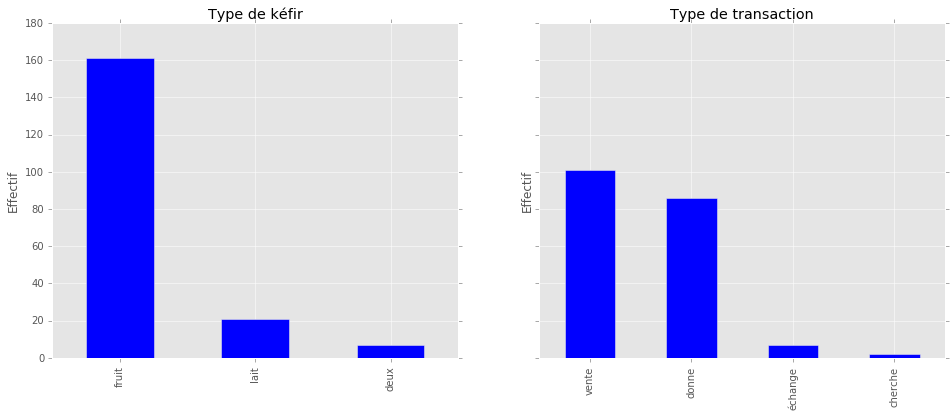

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

data["Type"].value_counts().plot(kind="bar",ax=ax[0])
ax[0].set_title("Type de kéfir")
ax[0].set_ylabel("Effectif")

data["transaction"].value_counts().plot(kind="bar",ax=ax[1])
ax[1].set_title("Type de transaction")
ax[1].set_ylabel("Effectif")

Tableau croisé des types de kéfir / transactions

In [175]:
pd.crosstab(data.type,data.transaction )

transaction,cherche,donne,vente,échange
type,,,,
deux,0,2,5,0
fruit,1,75,78,7
lait,1,5,15,0


Répartition des prix des annonces sur le kéfir

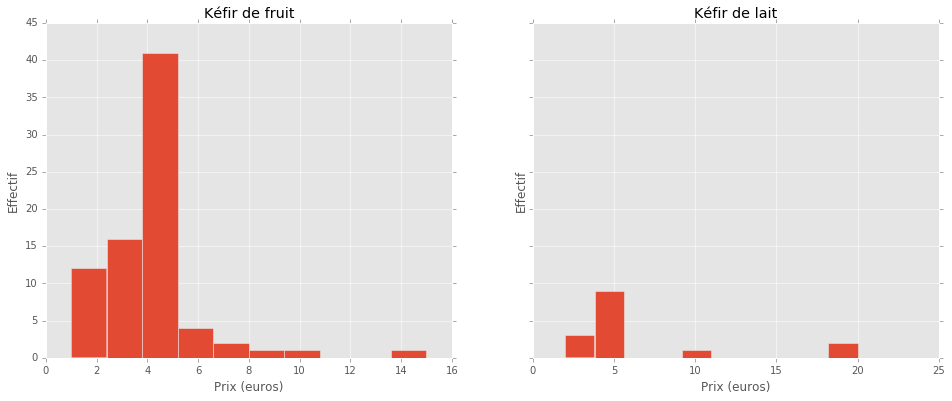

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
data[(data["prix"]!="NA") & (data["type"]=="fruit")]["prix"].hist(ax=ax[0])
ax[0].set_title("Kéfir de fruit")
ax[0].set_ylabel("Effectif")
ax[0].set_xlabel("Prix (euros)")
data[(data["prix"]!="NA") & (data["type"]=="lait")]["prix"].hist(ax=ax[1])
ax[1].set_title("Kéfir de lait")
ax[1].set_ylabel("Effectif")
ax[1].set_xlabel("Prix (euros)")

Prix au gramme du kéfir

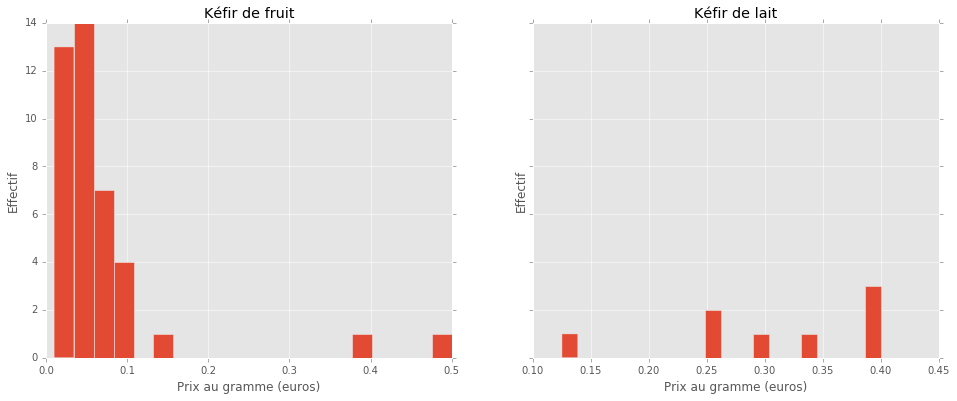

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
data[(data["poids_gramme"]!="NA") & (data["type"]=="fruit")]["poids_gramme"].hist(ax=ax[0],bins=20)
ax[0].set_title("Kéfir de fruit")
ax[0].set_ylabel("Effectif")
ax[0].set_xlabel("Prix au gramme (euros)")
data[(data["poids_gramme"]!="NA") & (data["type"]=="lait")]["poids_gramme"].hist(ax=ax[1],bins=20)
ax[1].set_title("Kéfir de lait")
ax[1].set_ylabel("Effectif")
ax[1].set_xlabel("Prix au gramme (euros)")

Présentation du kéfir comme un produit

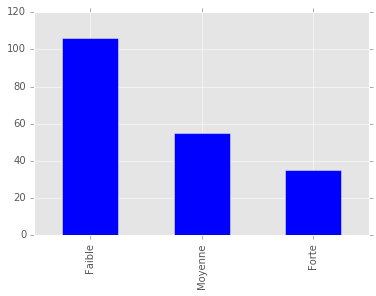

In [16]:
data["Produit"].value_counts().plot(kind="bar")

Mention explicite d'une recette

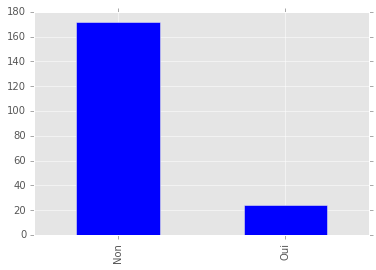

In [18]:
data["Recette"].value_counts().plot(kind="bar")

Mention des bienfaits

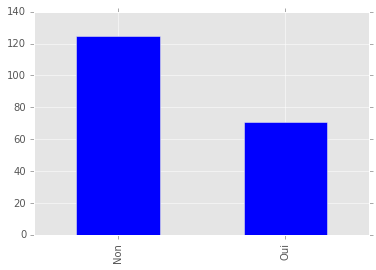

In [23]:
data["Bienfaits "].value_counts().plot(kind="bar")

Quelques croisements

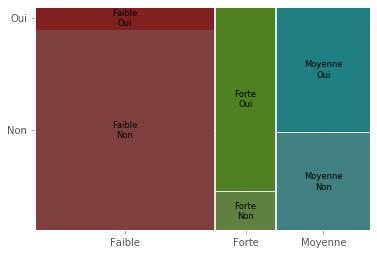

In [46]:
a = mosaic(pd.crosstab(data["Produit"],data["Bienfaits "]).stack())

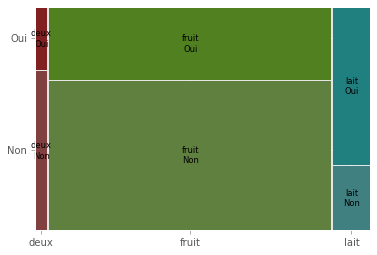

In [53]:
a = mosaic(pd.crosstab(data["Type"],data["Bienfaits "]).stack())

In [141]:
lbc = data

## Extraction à partir de craiglist

L'extraction est faite à partir d'un script tierce

In [273]:
data = pd.read_excel("craiglist-kefir-reco.xls")
data.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,        'Type',   'Bienfaits',     'Recette',
           'Produit', 'transaction',  'Importance'],
      dtype='object')

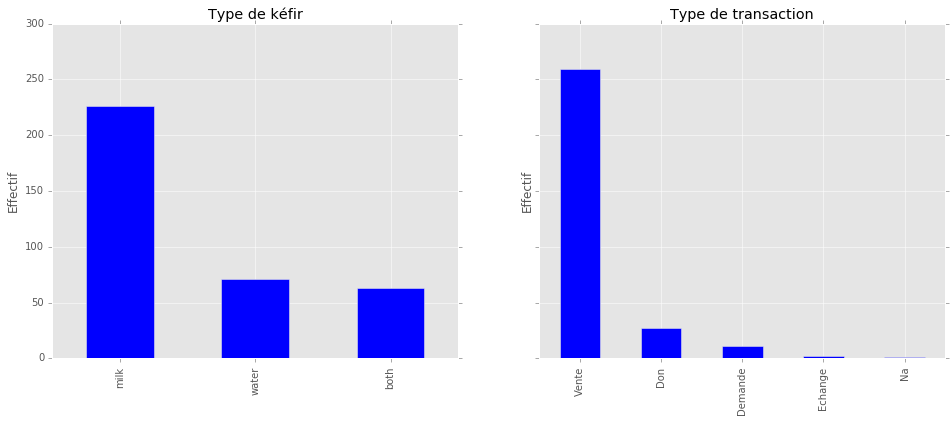

In [256]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

data["Type"].value_counts().plot(kind="bar",ax=ax[0])
ax[0].set_title("Type de kéfir")
ax[0].set_ylabel("Effectif")

data["transaction"].value_counts().plot(kind="bar",ax=ax[1])
ax[1].set_title("Type de transaction")
ax[1].set_ylabel("Effectif")

Ajout des données GPS pour le fichier craiglist non codé initialement (facultatif, à remonter dans le script d'aspiration)

def fun(x):
    print(x)
    html = bs4.BeautifulSoup(requests.get(x).content, 'html.parser')
    d = html.find("div",{"id":"map"})
    try:
        print((d["data-latitude"],d["data-longitude"]))
        return (d["data-latitude"],d["data-longitude"])
    except:
        return (0,0)
data["gps"] = data[1].apply(fun)
data["latitude"] = data.gps.apply(lambda x: x[0])
data["longitude"] = data.gps.apply(lambda x: x[1])
data.to_excel("craiglist-kefir-reco-geo.xls")

In [274]:
def fun(row):
    if row["transaction"]=="Vente":
        try:
            return int(row[5])
        except:
            return "NA"
    else:
        return "NA"
data["prix"] = data.apply(fun,axis=1)
data.Bienfaits = data.Bienfaits.apply(lambda x: x.strip())
data.Produit = data.Produit.apply(lambda x: x.strip())
cl = data

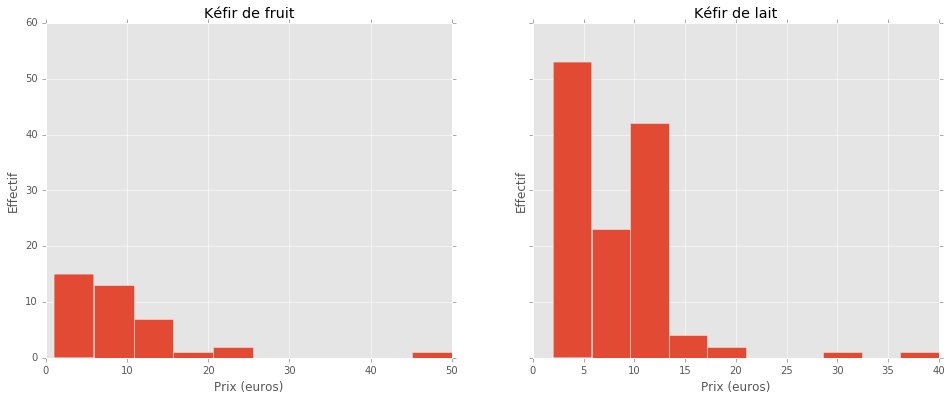

In [275]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
data[(data["prix"]!="NA") & (data["Type"]=="water")]["prix"].hist(ax=ax[0])
ax[0].set_title("Kéfir de fruit")
ax[0].set_ylabel("Effectif")
ax[0].set_xlabel("Prix (euros)")
data[(data["prix"]!="NA") & (data["Type"]=="milk")]["prix"].hist(ax=ax[1])
ax[1].set_title("Kéfir de lait")
ax[1].set_ylabel("Effectif")
ax[1].set_xlabel("Prix (euros)")

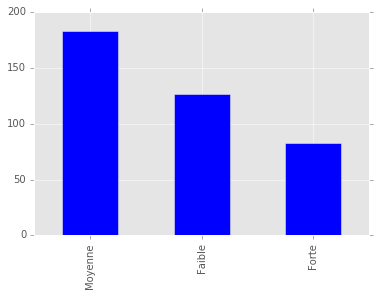

In [259]:
data["Produit"].value_counts().plot(kind="bar")

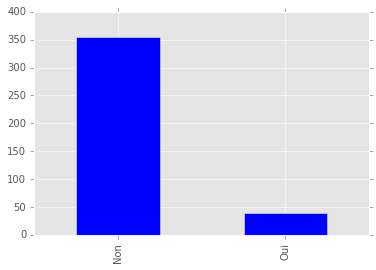

In [260]:
data["Recette"].value_counts().plot(kind="bar")

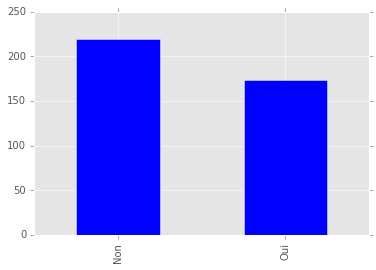

In [91]:
data["Bienfaits"].value_counts().plot(kind="bar")

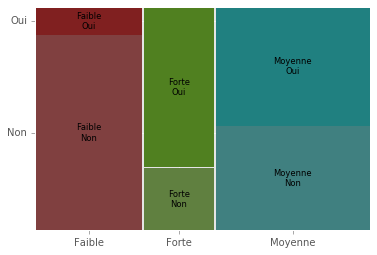

In [96]:
a = mosaic(pd.crosstab(data["Produit"],data["Bienfaits"]).stack())

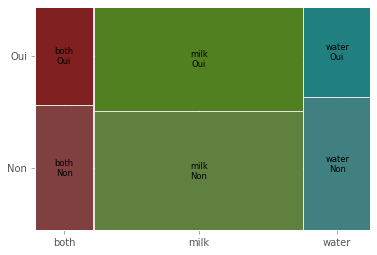

In [97]:
a = mosaic(pd.crosstab(data["Type"],data["Bienfaits"]).stack())

### Comparaison des deux jeux de données

Mise en forme des données pour le traitement ultérieur

In [276]:
def fun(x):
    if x=="lait":
        return "milk"
    if x=="fruit":
        return "water"
    if x=="deux":
        return "both"
    return x
lbc["Type"] = lbc["Type"].apply(fun)
def fun(x):
    d = {"vente":"sell","donne":"give","échange":"exchange","cherche":"search"}
    try:
        return d[x]
    except:
        return x
lbc["transaction"] = lbc["transaction"].apply(fun)
def fun(x):
    d = {"Vente":"sell","Don":"give","Echange":"exchange","Echange":"search","Demande":"ask"}
    try:
        return d[x]
    except:
        return x
cl["transaction"] = cl["transaction"].apply(fun)

Graphique sur le type de kéfir

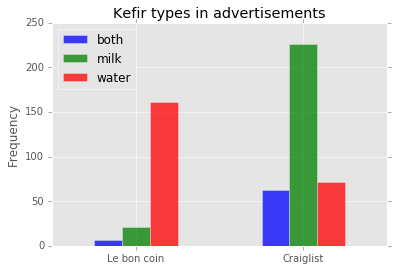

In [403]:
pd.DataFrame([lbc["Type"].value_counts(),cl["Type"].value_counts()],index=["Le bon coin","Craiglist"]).plot(kind="bar",alpha=0.75, rot=0)
plt.title("Kefir types in advertisements")
plt.ylabel("Frequency")
plt.savefig("kefir-type-kefir.png",dpi=300)

Comparaison sur le type d'annonces

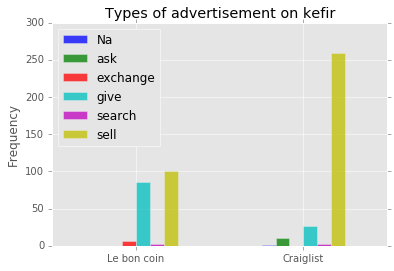

In [402]:
pd.DataFrame([lbc["transaction"].value_counts(),cl["transaction"].value_counts()],index=["Le bon coin","Craiglist"]).plot(kind="bar",alpha=0.75, rot=0)
plt.title("Types of advertisement on kefir")
plt.ylabel("Frequency")
plt.savefig("kefir-type-advertisement.png",dpi=300)

Construction d'une structure de données sur les deux jeux d'annonces

In [391]:
lbc["site"]="Le Bon coin"
cl["site"]="Craiglist"
cl["Prix"]=cl["prix"]
lbc["benefits"] = lbc["Bienfaits "]
cl["benefits"] = cl.Bienfaits
data = pd.concat([lbc[["site","Type","transaction","Prix","benefits","Produit"]],cl[["site","Type","transaction","Prix","benefits","Produit"]]])

Calculs d'indicateurs sur le prix mentionné dans les annonces

In [ ]:
data.Prix[data.Prix == "NA"] = np.nan
data["Prix"] = data["Prix"].astype(float)

In [379]:
data.groupby(["site","Type"])["Prix"].agg([np.sum, np.mean, np.std])

sum       mean       std
site        Type                           
Craiglist   both   461  10.720930  7.095691
            milk   994   7.888889  4.845158
            water  393  10.076923  8.417978
Le Bon coin both    22   4.400000  0.894427
            milk   100   6.666667  5.690426
            water  335   4.294872  2.007188

Tableau croisé sur un certain nombre de variables

In [401]:
pd.crosstab(data.transaction,[data.site,data.Type,data.benefits])

site        Craiglist                        Le Bon coin                     \
Type             both     milk     water            both     milk     water   
benefits          Non Oui  Non Oui   Non Oui         Non Oui  Non Oui   Non   
transaction                                                                   
Na                  0   0    1   0     0   0           0   0    0   0     0   
ask                 5   0    4   0     1   0           0   0    0   0     0   
exchange            0   0    0   0     0   0           0   0    0   0     6   
give                2   0   11   6     4   1           1   1    2   3    61   
search              0   0    0   1     0   1           0   0    1   0     1   
sell               25  25   73  68    25  17           4   1    3  12    40   

site             
Type             
benefits    Oui  
transaction      
Na            0  
ask           0  
exchange      1  
give         14  
search        0  
sell         38

Tabeau croisé (en pourcentage) de la relation entre la mention de bénéfice et le type de transaction

In [405]:
pd.crosstab(data.transaction,data.benefits).apply(lambda r: (100.0*r/r.sum()).apply(round), axis=1)

benefits,Non,Oui
transaction,,
Na,100,0
ask,100,0
exchange,86,14
give,76,24
search,50,50
sell,53,47


Tableau croisé sur les bénéfices/produit/site

In [412]:
pd.crosstab(data.Produit,[data.site,data.benefits])

site     Craiglist     Le Bon coin    
benefits       Non Oui         Non Oui
Produit                               
Faible         111  16          95  11
Forte           23  60           6  29
Moyenne         85  98          24  31

In [415]:
a = pd.crosstab(data.Produit,data.benefits)
print("Test du chi2",scipy.stats.chi2_contingency(a))
a

Test du chi2 (157.51409222927418, 6.2553189895874582e-35, 2, array([[ 136.08149406,   96.91850594],
       [  68.91680815,   49.08319185],
       [ 139.00169779,   98.99830221]]))


benefits,Non,Oui
Produit,,
Faible,206,27
Forte,29,89
Moyenne,109,129
